## Installing requirements and download and preparing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/DSL_Winter_Project_2024.zip ./

In [ ]:
# !gdown https://drive.google.com/uc?id=1RqoGwJ7lkcXc7INE9hINUQZW2O8ltBcB

!unzip -q ./DSL_Winter_Project_2024.zip
!mv ./DSL_Winter_Project_2024/development.csv .
!mv ./DSL_Winter_Project_2024/evaluation.csv .
!mv ./DSL_Winter_Project_2024/sample_submission.csv .
!rm -rf /content/__MACOSX ./DSL_Winter_Project_2024 ./DSL_Winter_Project_2024.zip

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_development = pd.read_csv("development.csv");
df_evaluation = pd.read_csv("evaluation.csv")

### Plotting X and Y of each row.

<Axes: xlabel='x', ylabel='y'>

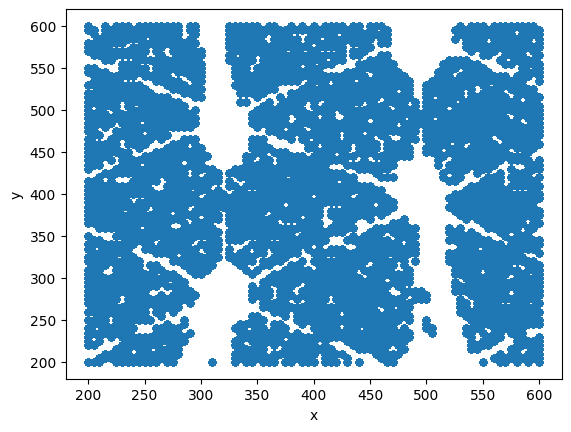

In [ ]:
df_development.plot.scatter(x="x",y="y",alpha=0.5)

### x and y range from 200 to 600 and are multiply of 5

In [ ]:
df_development['x'].unique()

array([200., 205., 210., 215., 220., 225., 230., 235., 240., 245., 250.,
       255., 260., 265., 270., 275., 280., 285., 290., 295., 300., 305.,
       310., 315., 320., 325., 330., 335., 340., 345., 350., 355., 360.,
       365., 370., 375., 380., 385., 390., 395., 400., 405., 410., 415.,
       420., 425., 430., 435., 440., 445., 450., 455., 460., 465., 470.,
       475., 480., 485., 490., 495., 500., 505., 510., 515., 520., 525.,
       530., 535., 540., 545., 550., 555., 560., 565., 570., 575., 580.,
       585., 590., 595., 600.])

In [ ]:
df_development['y'].unique()

array([200., 220., 225., 230., 235., 240., 250., 260., 270., 275., 280.,
       285., 290., 295., 300., 305., 310., 320., 325., 335., 340., 350.,
       365., 370., 375., 380., 385., 390., 395., 400., 405., 410., 415.,
       430., 435., 440., 445., 450., 455., 460., 465., 475., 480., 485.,
       490., 495., 500., 505., 510., 515., 520., 530., 545., 550., 570.,
       575., 580., 595., 600., 245., 265., 315., 330., 345., 470., 535.,
       540., 565., 590., 205., 255., 360., 420., 525., 585., 210., 425.,
       560., 215., 355., 555.])

## Data preparation

### 1. Removing noise and unimportant columns

First we plotted all columns of all features using box plots, we found out that the behavior of pads number 0, 7, 12, 15, 16, 17 are different from others in most of sub-features including pmax, area, tmax, so probably we can say that they are noises. but we can't definitely say which features are noises and which are not, and it is a complex task.

behavior of some features like rms is different and we can not have illusion from box plot
hence, we tried some numeric based methods like calculating the **Variance** and **Median Absolute Deviation (MAD)** of each feacture to select the N largests in each category (for example all tmax columns) as the noise columns. But the result of each category of features were completely different.
From this two way we can understand that some pads like number 17, 16, 15 are probably unimportant.

Then we used two key tool as measures to solve the problem. **Mutual Information (MI)** and **Feature Importance Score in Random Forest** and we decided to focus on select the best useful features instead of removing unimportant ones.

The explanation for each of the measures is in it's part ↓

#### Box plots

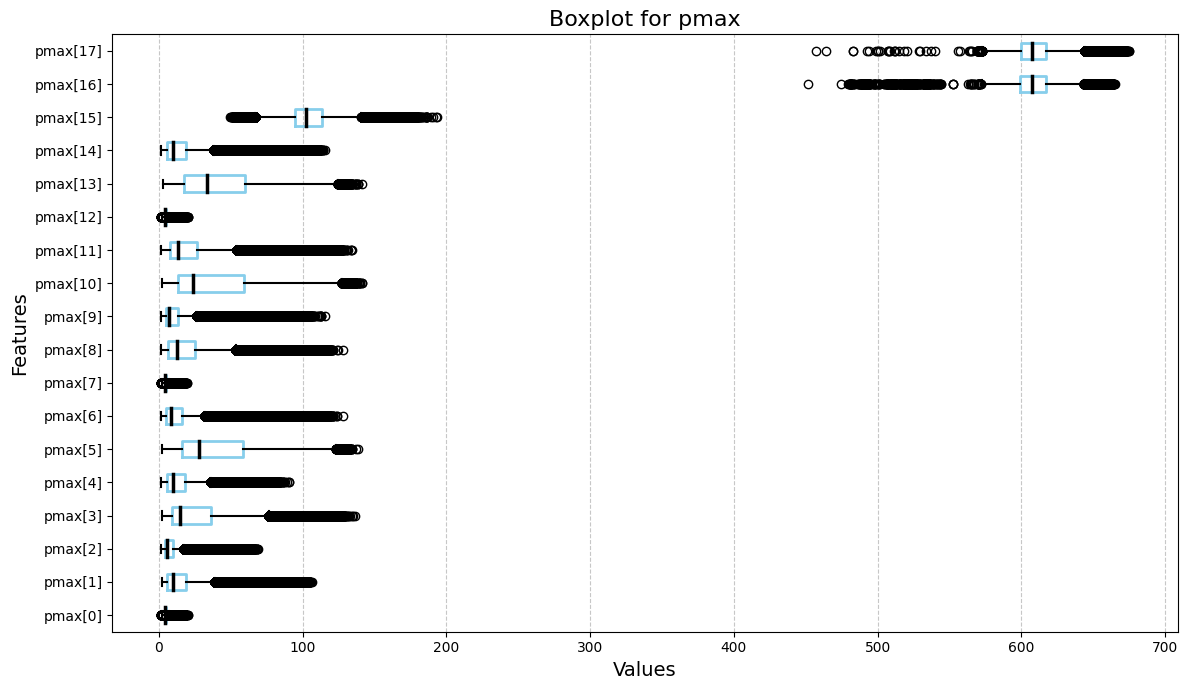

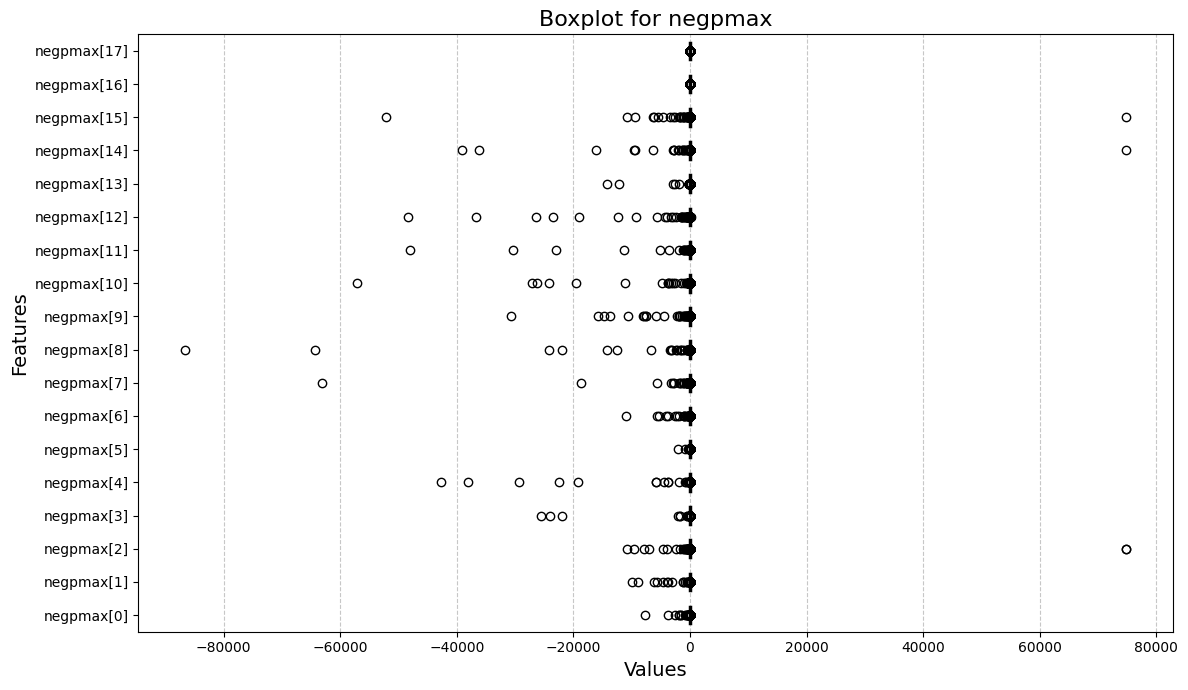

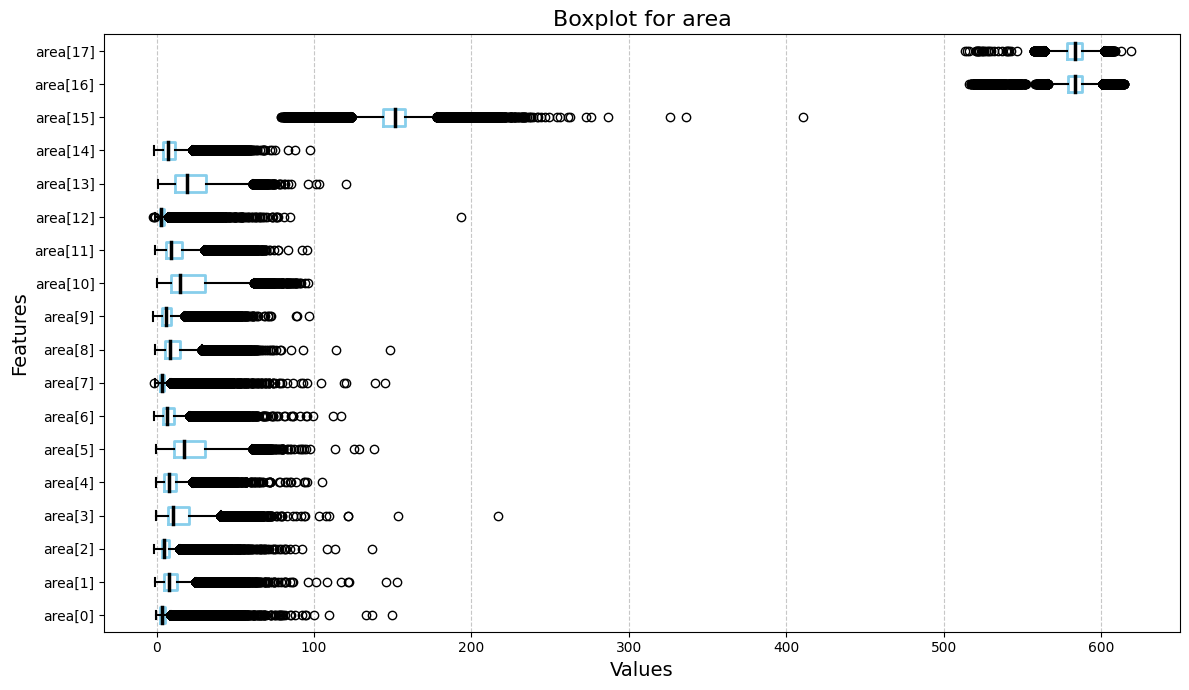

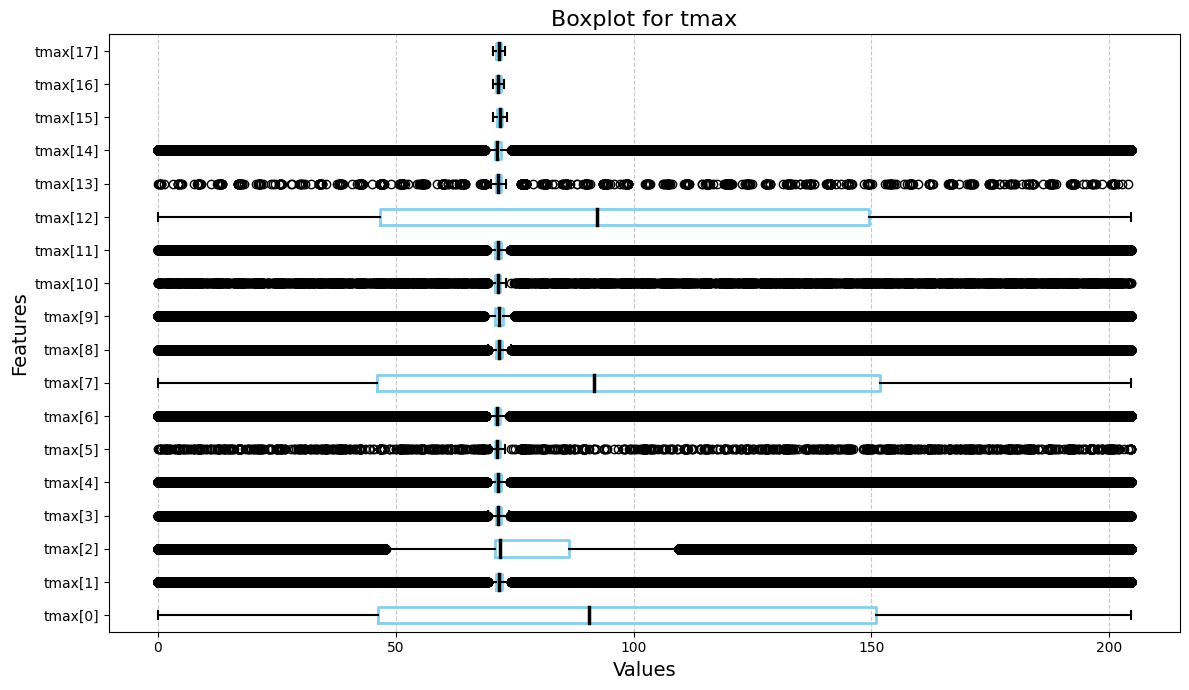

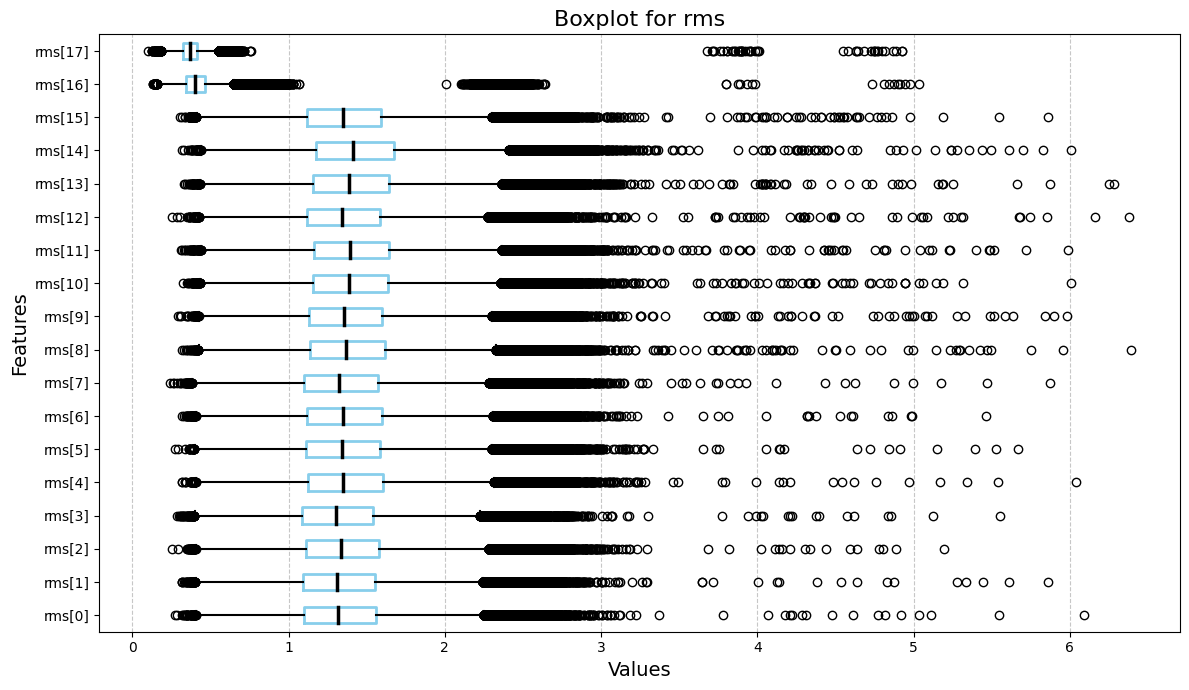

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

boxplot_color = 'skyblue'
features = ['pmax', 'negpmax', 'area', 'tmax', 'rms']

for f in features:
    columns = [col for col in df_development.columns if col.startswith(f)]
    fig, ax = plt.subplots(figsize=(12, 7))

    boxprops = dict(linewidth=2, color=boxplot_color)
    medianprops = dict(linestyle='-', linewidth=2.5, color='black')  # Black median line
    whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')  # Black whiskers
    capprops = dict(linewidth=1.5, color='black')  # Black caps

    ax.boxplot(df_development[columns], positions=np.arange(1, len(columns) + 1), vert=False, boxprops=boxprops,
               medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

    ax.set_yticks(np.arange(1, len(columns) + 1))
    ax.set_yticklabels(columns)

    ax.grid(axis='x', linestyle='--', alpha=0.7)

    ax.set_title(f'Boxplot for {f}', fontsize=16)
    ax.set_xlabel('Values', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)

    plt.tight_layout()
    plt.show()
    print('\n')


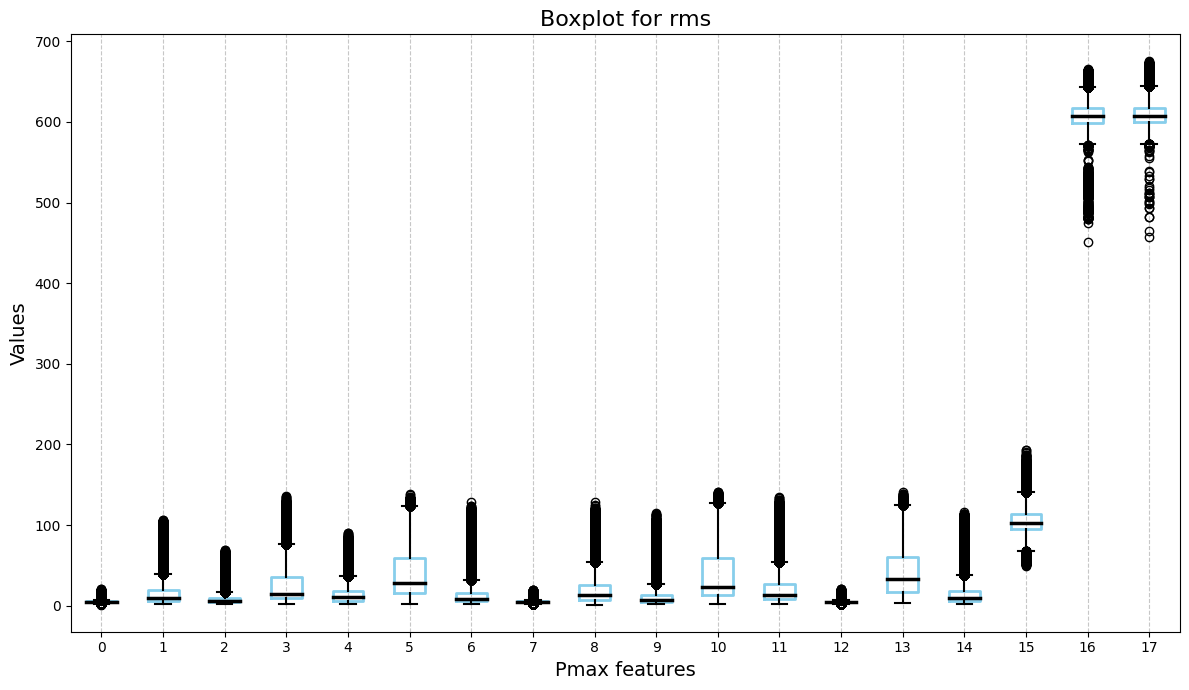

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

boxplot_color = 'skyblue'
feature = 'pmax'

columns = [col for col in df_development.columns if col.startswith(feature)]
fig, ax = plt.subplots(figsize=(12, 7))

boxprops = dict(linewidth=2, color=boxplot_color)
medianprops = dict(linestyle='-', linewidth=2.5, color='black')  # Black median line
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')  # Black whiskers
capprops = dict(linewidth=1.5, color='black')  # Black caps

ax.boxplot(df_development[columns], positions=np.arange(1, len(columns) + 1), vert=True, boxprops=boxprops,
            medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

ax.set_xticks(np.arange(1, len(columns) + 1))
ax.set_xticklabels(list(range(18)))

ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.set_title(f'Boxplot for {f}', fontsize=16)
ax.set_ylabel('Values', fontsize=14)
ax.set_xlabel('Pmax features', fontsize=14)

plt.tight_layout()
plt.show()
print('\n')


#### Mutual Information Scores (MI)

In these 3 cells, we calculated the MI score betwen each column and x, y in our dataset and sort them based on their categories.
And in the end we select the best columns by setting a threshold (MI > 0.1).

**The important point is that we calculated MI score of each column one time separately with x and then with y.
Because we believe that by predicting value for x and y separately we will have a less complex model for each of them, so we can achieve a better result.**

In [ ]:
xfeatures_mi_info = [] # features Sorted by mutual information scores with target x (including their mi socre and rank, also categorized due to their category (pmax, tmax ...))
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X = df_development.drop(columns=['x', 'y'])
selectorx = SelectKBest(score_func=mutual_info_regression, k='all')
selectorx.fit(X, df_development['x'])
mi_scoresx = selectorx.scores_
# sort features by mutual information scores
sorted_featuresx = sorted(zip(X.columns, mi_scoresx), key=lambda x: x[1], reverse=True)
xfeatures_mi_info.append(sorted_featuresx)
# print the rank and value of mutual information for each feature
for rank, (feature, mi_value) in enumerate(sorted_featuresx, start=1):
    print(f"Rank {rank}: Feature '{feature}' - Mutual Information: {mi_value:.4f}")

Rank 1: Feature 'pmax[8]' - Mutual Information: 1.0648
Rank 2: Feature 'pmax[1]' - Mutual Information: 0.8378
Rank 3: Feature 'pmax[13]' - Mutual Information: 0.7667
Rank 4: Feature 'pmax[14]' - Mutual Information: 0.7450
Rank 5: Feature 'area[8]' - Mutual Information: 0.7347
Rank 6: Feature 'negpmax[13]' - Mutual Information: 0.6819
Rank 7: Feature 'negpmax[8]' - Mutual Information: 0.6395
Rank 8: Feature 'area[13]' - Mutual Information: 0.6242
Rank 9: Feature 'pmax[5]' - Mutual Information: 0.5340
Rank 10: Feature 'area[1]' - Mutual Information: 0.5337
Rank 11: Feature 'area[14]' - Mutual Information: 0.5032
Rank 12: Feature 'pmax[6]' - Mutual Information: 0.4964
Rank 13: Feature 'negpmax[5]' - Mutual Information: 0.4942
Rank 14: Feature 'negpmax[1]' - Mutual Information: 0.4780
Rank 15: Feature 'pmax[10]' - Mutual Information: 0.4690
Rank 16: Feature 'negpmax[10]' - Mutual Information: 0.4299
Rank 17: Feature 'area[5]' - Mutual Information: 0.4244
Rank 18: Feature 'pmax[9]' - Mutual

In [ ]:
yfeatures_mi_info = [] # features Sorted by mutual information scores with target x (including their mi socre and rank, also categorized due to their category (pmax, tmax ...))
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X = df_development.drop(columns=['x', 'y'])
selectory = SelectKBest(score_func=mutual_info_regression, k='all')
selectory.fit(X, df_development['y'])
mi_scoresy = selectory.scores_
# sort features by mutual information scores
sorted_featuresy = sorted(zip(X.columns, mi_scoresy), key=lambda x: x[1], reverse=True)
yfeatures_mi_info.append(sorted_featuresy)
# print the rank and value of mutual information for each feature
for rank, (feature, mi_value) in enumerate(sorted_featuresy, start=1):
    print(f"Rank {rank}: Feature '{feature}' - Mutual Information: {mi_value:.4f}")

Rank 1: Feature 'pmax[4]' - Mutual Information: 0.8920
Rank 2: Feature 'pmax[11]' - Mutual Information: 0.8201
Rank 3: Feature 'pmax[3]' - Mutual Information: 0.8041
Rank 4: Feature 'pmax[10]' - Mutual Information: 0.6919
Rank 5: Feature 'pmax[5]' - Mutual Information: 0.6023
Rank 6: Feature 'negpmax[10]' - Mutual Information: 0.5777
Rank 7: Feature 'area[11]' - Mutual Information: 0.5719
Rank 8: Feature 'area[3]' - Mutual Information: 0.5670
Rank 9: Feature 'negpmax[3]' - Mutual Information: 0.5663
Rank 10: Feature 'negpmax[11]' - Mutual Information: 0.5544
Rank 11: Feature 'area[10]' - Mutual Information: 0.5345
Rank 12: Feature 'area[4]' - Mutual Information: 0.5326
Rank 13: Feature 'negpmax[5]' - Mutual Information: 0.5201
Rank 14: Feature 'pmax[13]' - Mutual Information: 0.4697
Rank 15: Feature 'area[5]' - Mutual Information: 0.4622
Rank 16: Feature 'negpmax[13]' - Mutual Information: 0.4421
Rank 17: Feature 'negpmax[4]' - Mutual Information: 0.4416
Rank 18: Feature 'area[13]' - M

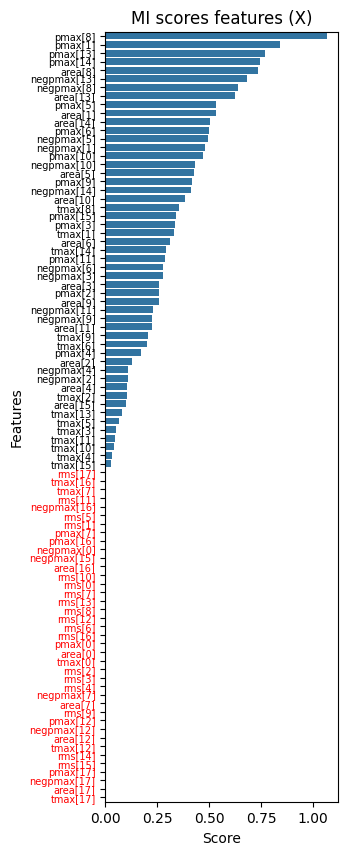

In [ ]:
features = [row[0] for row in sorted_featuresx]
mi_values = [row[1] for row in sorted_featuresx]

plt.figure(figsize=(3, 10))
%matplotlib inline

sns.barplot(x=mi_values, y=features, orient="h")

ax = plt.gca()
for tick, value in zip(ax.get_yticklabels(), mi_values):
    tick.set_color('red' if value < 0.02 else 'black')  # 'black' for default color

plt.yticks(fontsize=7)

plt.xlabel('Score')
plt.ylabel('Features')
plt.title("MI scores features (X)")

plt.show()

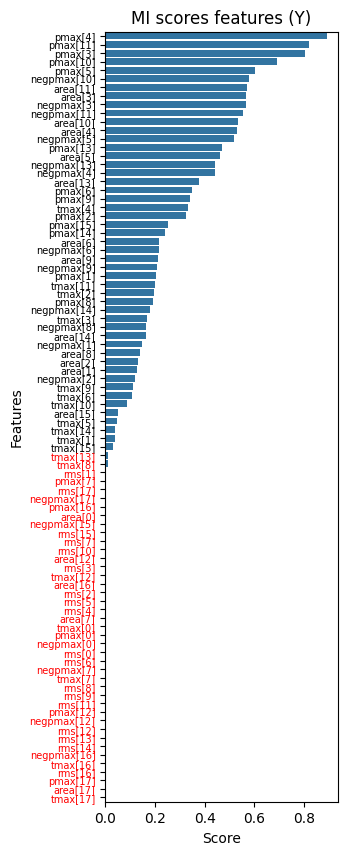

In [ ]:
features = [row[0] for row in sorted_featuresy]
mi_values = [row[1] for row in sorted_featuresy]

plt.figure(figsize=(3, 10))
%matplotlib inline

sns.barplot(x=mi_values, y=features, orient="h")

ax = plt.gca()
for tick, value in zip(ax.get_yticklabels(), mi_values):
    tick.set_color('red' if value < 0.02 else 'black')  # 'black' for default color

plt.yticks(fontsize=7)

plt.xlabel('Score')
plt.ylabel('Features')
plt.title("MI scores features (Y)")

plt.show()

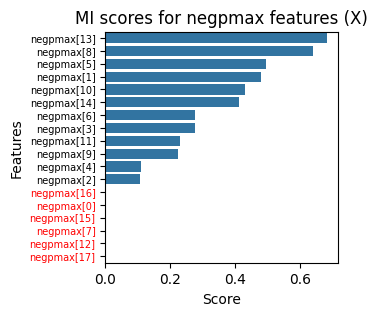

In [ ]:
columns = [col for col in df_development.columns if col.startswith('negpmax')]
features = []
mi_values = []
for rank, (feature, mi_value) in enumerate(sorted_featuresx, start=1):
  if feature in columns:
    mi_values.append(mi_value)
    features.append(feature)

plt.figure(figsize=(3, 3))
%matplotlib inline

sns.barplot(x=mi_values, y=features, orient="h")

ax = plt.gca()
for tick, value in zip(ax.get_yticklabels(), mi_values):
    tick.set_color('red' if value < 0.02 else 'black')  # 'black' for default color

plt.yticks(fontsize=7)

plt.xlabel('Score')
plt.ylabel('Features')
plt.title("MI scores for negpmax features (X)")

plt.show()

In [ ]:
# select feactures with mi score more than mi_threshold
mi_threshold = 0.02
selected_featuresx = []
for features_list in xfeatures_mi_info:
  for (feature, mi_value) in features_list:
    if mi_value > mi_threshold:
      selected_featuresx.append(feature)

selected_featuresy = []
for features_list in yfeatures_mi_info:
  for (feature, mi_value) in features_list:
    if mi_value > mi_threshold:
      selected_featuresy.append(feature)

print(f'Number of selected features for predicting X: {len(selected_featuresx)}\nFeatures:{selected_featuresx}')
print(f'Number of selected features for predicting Y: {len(selected_featuresy)}\nFeatures:{selected_featuresy}')

Number of selected features for predicting X: 51
Features:['pmax[8]', 'pmax[1]', 'pmax[13]', 'pmax[14]', 'area[8]', 'negpmax[13]', 'negpmax[8]', 'area[13]', 'pmax[5]', 'area[1]', 'area[14]', 'pmax[6]', 'negpmax[5]', 'negpmax[1]', 'pmax[10]', 'negpmax[10]', 'area[5]', 'pmax[9]', 'negpmax[14]', 'area[10]', 'tmax[8]', 'pmax[15]', 'pmax[3]', 'tmax[1]', 'area[6]', 'tmax[14]', 'pmax[11]', 'negpmax[6]', 'negpmax[3]', 'area[3]', 'pmax[2]', 'area[9]', 'negpmax[11]', 'negpmax[9]', 'area[11]', 'tmax[9]', 'tmax[6]', 'pmax[4]', 'area[2]', 'negpmax[4]', 'negpmax[2]', 'area[4]', 'tmax[2]', 'area[15]', 'tmax[13]', 'tmax[5]', 'tmax[3]', 'tmax[11]', 'tmax[10]', 'tmax[4]', 'tmax[15]']
Number of selected features for predicting Y: 49
Features:['pmax[4]', 'pmax[11]', 'pmax[3]', 'pmax[10]', 'pmax[5]', 'negpmax[10]', 'area[11]', 'area[3]', 'negpmax[3]', 'negpmax[11]', 'area[10]', 'area[4]', 'negpmax[5]', 'pmax[13]', 'area[5]', 'negpmax[13]', 'negpmax[4]', 'area[13]', 'pmax[6]', 'pmax[9]', 'tmax[4]', 'pmax[2]

#### Random Forest Feature Importance

In this part we created two models (one for x and one for y) using the feactures selected using MI > 0.1 and then we plotted the importance of features.

Then we select the features with importance > 0.001 as our final selection for training our model.

(We tried a lot of combination for thresholds and algorithm for feature selection in this project, and the things we wrote hear, are the best out of them.)

In [ ]:
# create a Random Forest regressor on the features selected for predicting x , y
from sklearn.ensemble import RandomForestRegressor
x_rf_regressor = RandomForestRegressor(n_estimators=100, max_features='sqrt',
                                       bootstrap=True, min_samples_split=2, max_depth=None, random_state=42)
y_rf_regressor = RandomForestRegressor(n_estimators=100, max_features='sqrt',
                                       bootstrap=True, min_samples_split=2, max_depth=None, random_state=42)

# train the model
x_rf_regressor.fit(df_development[selected_featuresx], df_development['x'])
y_rf_regressor.fit(df_development[selected_featuresy], df_development['y'])

RandomForestRegressor(max_features='sqrt', random_state=42)

In [ ]:
feature_impx = pd.Series(x_rf_regressor.feature_importances_,index=selected_featuresx).sort_values(ascending=False)
feature_impy = pd.Series(y_rf_regressor.feature_importances_,index=selected_featuresy).sort_values(ascending=False)

<ipython-input-152-3a293f1298d4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_impx, y=feature_impx.index, orient="h", palette=bar_colors)
<ipython-input-152-3a293f1298d4>:13: UserWarning: 
The palette list has fewer values (49) than needed (51) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=feature_impx, y=feature_impx.index, orient="h", palette=bar_colors)


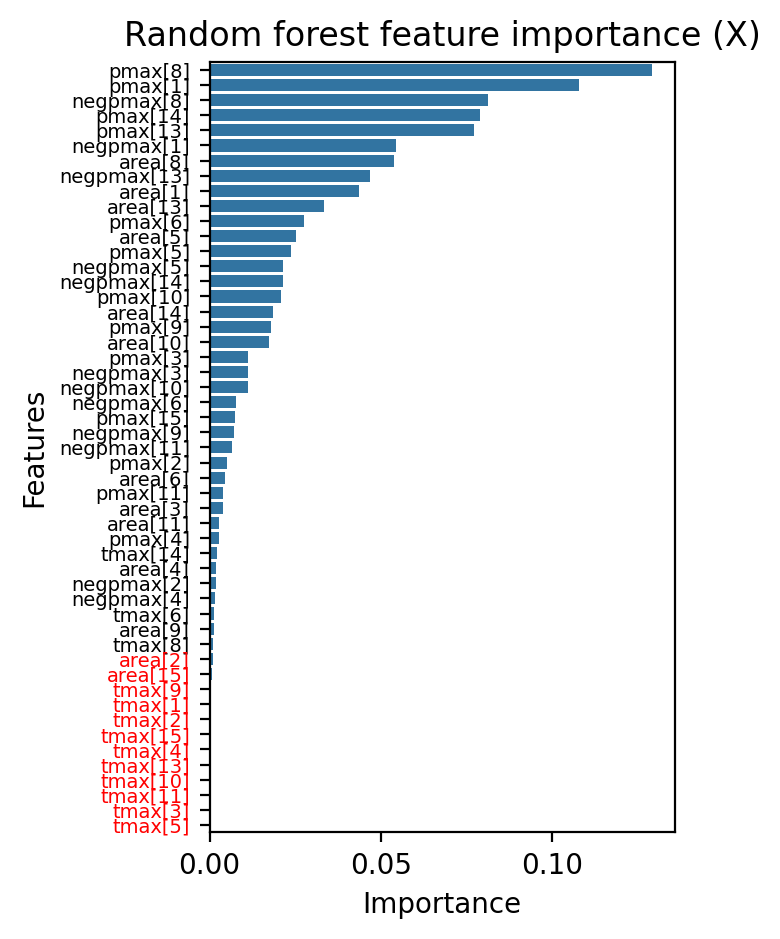

In [ ]:
plt.figure(figsize=(3, 5),dpi=200)
%matplotlib inline

sns.barplot(x=feature_impx, y=feature_impx.index, orient="h", palette=bar_colors)

ax = plt.gca()
for tick, value in zip(ax.get_yticklabels(), feature_impx):
    tick.set_color('red' if value < 0.001 else 'black')  # 'black' for default color

plt.yticks(fontsize=7)

# Add labels to the graph
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title("Random forest feature importance (X)")

plt.show()

<ipython-input-151-51cc249139c0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_impy, y=feature_impy.index, orient="h", palette=bar_colors)


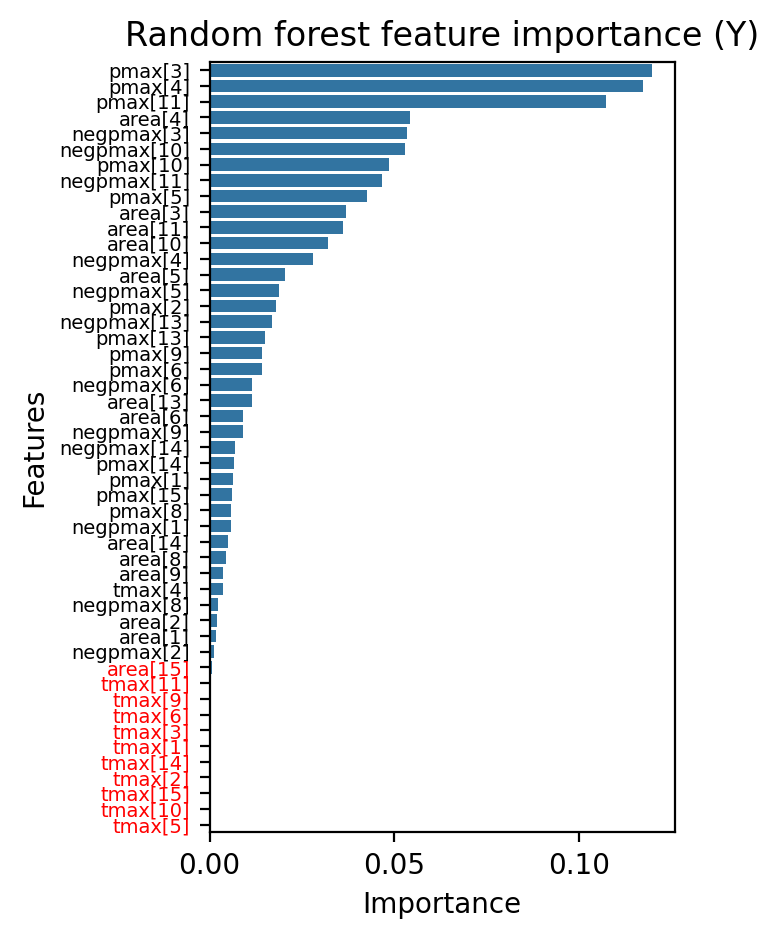

In [ ]:
plt.figure(figsize=(3, 5),dpi=200)
%matplotlib inline

sns.barplot(x=feature_impy, y=feature_impy.index, orient="h", palette=bar_colors)

ax = plt.gca()
for tick, value in zip(ax.get_yticklabels(), feature_impy):
    tick.set_color('red' if value < 0.001 else 'black')  # 'black' for default color

plt.yticks(fontsize=7)

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title("Random forest feature importance (Y)")

plt.show()

In [ ]:
# choose the features that their importance is more than the threshold (0.001)
threshold = 0.001

# X
selected_featuresx = list(feature_impx[feature_impx > threshold].index)
print(f'Number of selected features for predicting X: {len(selected_featuresx)}\nFeatures:{selected_featuresx}')

# Y
selected_featuresy = list(feature_impy[feature_impy > threshold].index)
print(f'Number of selected features for predicting Y: {len(selected_featuresy)}\nFeatures:{selected_featuresy}')

Number of selected features for predicting X: 39
Features:['pmax[8]', 'pmax[1]', 'negpmax[8]', 'pmax[14]', 'pmax[13]', 'area[8]', 'negpmax[13]', 'area[1]', 'negpmax[1]', 'area[13]', 'pmax[6]', 'pmax[5]', 'area[5]', 'area[10]', 'negpmax[5]', 'negpmax[14]', 'pmax[10]', 'area[14]', 'negpmax[10]', 'pmax[9]', 'negpmax[3]', 'pmax[3]', 'negpmax[6]', 'pmax[15]', 'negpmax[9]', 'negpmax[11]', 'pmax[2]', 'pmax[4]', 'area[11]', 'pmax[11]', 'area[6]', 'area[3]', 'negpmax[4]', 'area[2]', 'tmax[14]', 'tmax[8]', 'area[4]', 'area[9]', 'negpmax[2]']
Number of selected features for predicting Y: 38
Features:['pmax[3]', 'pmax[4]', 'pmax[11]', 'area[4]', 'negpmax[3]', 'negpmax[10]', 'pmax[10]', 'negpmax[11]', 'pmax[5]', 'area[3]', 'area[11]', 'area[10]', 'negpmax[4]', 'area[5]', 'negpmax[5]', 'pmax[2]', 'negpmax[13]', 'pmax[13]', 'pmax[9]', 'pmax[6]', 'negpmax[6]', 'area[13]', 'area[6]', 'negpmax[9]', 'negpmax[14]', 'pmax[14]', 'pmax[1]', 'pmax[15]', 'pmax[8]', 'negpmax[1]', 'area[14]', 'area[8]', 'area[9]

### 2.Standardizing the data

Next, We standardize all columns (except x and y) of two DataFrames, df_development and df_evaluation, using scikit-learn's StandardScaler.
In the end, we have df_train (includes standardaized data of df_development for training), df_label (includes x and y for each row of df_train), and df_evaluation_scaled (standardied format of df_evaluation).

In [ ]:
df_train = df_development.drop(columns=['x', 'y'])
df_label = df_development[['x', 'y']]
scaler = StandardScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_evaluation_scaled = pd.DataFrame(scaler.transform(df_evaluation.drop(columns=['Id'])), columns=df_evaluation.columns[1:])


df_evaluation_scaled['Id'] = df_evaluation['Id']

In [ ]:
df_train

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,-0.539769,-0.796333,-0.424875,-1.631676,1.948113,-0.661545,-0.284868,-0.706461,-1.819870,0.669864,...,-0.112338,1.858370,0.049734,1.288852,-0.261962,0.420479,2.033268,1.257470,1.085439,0.421653
1,0.709131,0.020724,0.419063,-0.299922,0.654864,-0.720831,0.148591,-0.803374,1.145795,-0.315801,...,1.581005,0.771351,-0.530615,-1.037841,-0.165920,1.140850,1.625614,0.501896,-1.035307,0.425256
2,-0.391415,-0.017003,-0.565742,-0.386813,0.187510,-0.711719,0.106909,-0.830605,1.010424,-0.939904,...,0.381059,0.466209,-0.475743,0.456415,0.386813,-0.906257,1.210071,-1.282658,0.424451,1.549014
3,-0.582485,0.027000,-0.613711,-0.918403,0.501802,-0.684792,0.165512,-0.440307,3.262701,0.043906,...,-0.578259,-0.333913,-0.554714,1.261660,-0.659403,-1.241779,-1.080827,0.148622,1.089288,-0.421708
4,-0.282387,0.012434,-0.095573,1.666664,-0.699511,-0.790196,0.113647,-0.953891,2.737834,-1.690921,...,0.078185,-0.449262,0.991063,-0.657011,-0.130535,-0.153862,-0.862903,0.179607,-0.772604,-0.941696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385495,0.124897,0.073940,2.925107,-1.103450,-0.692390,1.984914,-0.570141,1.690792,-0.212050,-0.922170,...,-1.945290,0.797234,-0.473910,-0.797892,0.872603,0.399865,-0.075042,1.645473,-0.573000,-0.306833
385496,-0.539258,-0.030747,-0.664520,-0.965506,1.621815,2.056252,-0.565863,1.964295,-0.198763,0.690517,...,-1.261817,0.608881,0.832995,-0.114638,-0.423989,-1.396972,-0.883379,0.820806,-0.265967,-0.636151
385497,-0.420511,-0.047570,-0.324128,0.896603,-0.268647,1.796743,-0.726257,1.714352,-0.205407,-0.234287,...,0.805010,-1.408488,-0.224115,-0.359875,-0.073836,0.139228,0.948993,0.872813,-0.214655,-0.846418
385498,6.539226,0.001820,0.583646,-0.427187,-0.364588,1.788048,-0.445079,2.683399,-0.198763,0.380897,...,-0.780780,-0.537199,0.847359,-0.349358,0.071320,0.158164,-0.708595,0.694589,-0.391128,0.453945


In [ ]:
df_label

,x,y
0,200.0,200.0
1,200.0,200.0
2,200.0,200.0
3,200.0,200.0
4,200.0,200.0
...,...,...
385495,600.0,595.0
385496,600.0,595.0
385497,600.0,595.0
385498,600.0,595.0


In [ ]:
df_evaluation_scaled

,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17],Id
0,-0.314475,0.049654,-0.421356,1.329080,0.649835,-0.463173,0.186580,-0.586219,-0.218694,-1.779964,...,-0.025498,-0.049987,-1.618892,1.362733,-0.009240,1.205317,-2.151075,-1.604789,-0.523905,0
1,0.494963,0.130471,1.452980,-0.116351,-0.616180,0.414148,-0.381527,0.887510,-0.152255,-0.226941,...,1.635735,-4.969618,1.995712,-0.646973,0.331084,0.710686,0.462202,2.058184,0.369579,1
2,-0.765875,-0.038805,-0.687663,0.969079,-1.223690,-0.695584,0.065553,-0.854452,-0.343021,-1.591059,...,-1.433748,-0.111873,-0.383145,0.333095,-0.004599,0.300146,0.923983,-0.494072,-0.334640,2
3,0.534227,0.028078,0.361819,-1.129303,-0.207712,4.218054,-1.221786,3.306310,-0.185475,-1.766471,...,-1.928083,-0.862788,0.663684,-0.306302,0.246973,-0.761939,0.105136,0.633463,0.715073,3
4,-0.776224,0.029120,-0.683086,-1.076534,-0.753198,-0.412217,0.127315,-0.324107,-0.165063,0.695020,...,1.435476,2.447332,1.078883,-0.208060,0.897249,0.497894,2.564057,0.778445,-0.152198,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128495,0.662124,0.128788,0.797610,1.463406,0.505282,-0.428050,0.183050,-0.455531,-0.198763,-1.304562,...,0.191684,0.422866,-0.430960,-0.279855,-0.783018,0.706573,0.588857,-0.217905,0.244718,128495
128496,-0.608550,-0.043171,-0.755254,0.403843,0.660615,-0.636235,0.100222,-0.748398,-1.905003,0.255086,...,0.048758,0.294111,-0.458165,-0.489662,0.676524,1.363917,0.060164,-0.401817,-0.350208,128496
128497,-0.834493,0.000048,-0.652892,0.294076,0.446059,0.172326,0.034292,0.094741,-0.218694,0.101720,...,-1.157679,0.315604,-1.675164,0.019850,-1.171180,-0.761154,-0.995710,-1.517938,-1.173865,128497
128498,-0.794148,-0.021774,-0.202263,1.166335,-0.608275,-0.733595,0.129374,-0.929881,-0.198763,-1.182139,...,-0.280739,-1.119475,-0.695375,0.344715,-0.432589,0.498263,0.834041,-0.608278,1.705647,128498


## Training methods

As we mentioned in the Mutual Information Scores section (Data preparation), we decided to train two separate models, one for x and one for y. because in our opinion, we can see the prediction of x and y as two independent problems.

By doing so we will have two simpler problems to solve, and our trained model will be less complex.

In the cells below we will train two MLP model (for x and y). We have tested a couple of algorithms (Random Forest Regressor, MLP, and ensemble MLP)
 and use trial and and error to calculate best tuning and achieve the best performance.
But using ensenble MLP we could achieve our best average Euclidean distance 3.875.

#### Random Forest Regressor :
The result (average euclidean distance) for evaluation dataset on the leaderboard website (http://trinidad.polito.it:8888/) was **4.824** for this approach.

In [ ]:
# create a Random Forest regressor on the features selected for predicting x
x_rf_regressor = RandomForestRegressor(n_estimators=100, max_features='sqrt',
                                       bootstrap=True, min_samples_split=2, max_depth=None, random_state=42)
y_rf_regressor = RandomForestRegressor(n_estimators=100, max_features='sqrt',
                                       bootstrap=True, min_samples_split=2, max_depth=None, random_state=42)

# train the model
x_rf_regressor.fit(df_development[selected_featuresx], df_development['x'])
y_rf_regressor.fit(df_development[selected_featuresy], df_development['y'])

RandomForestRegressor(max_features='sqrt', random_state=42)

In [ ]:
x_preds = x_rf_regressor.predict(df_evaluation[selected_featuresx])
y_preds = y_rf_regressor.predict(df_evaluation[selected_featuresy])

# create a new DataFrame for the submission file
submission_df = pd.DataFrame({'Id': df_evaluation['Id'], 'Predicted': [f"{x}|{y}" for x, y in zip(x_preds, y_preds)]})

submission_df.to_csv('submission_randomforest.csv', index=False)

#### Multilayer perceptron (MLP) :
We trained our MLP model with these hyperparameters:
  1. hidden_layer_sizes=(128, 64, 32) : we have tested different numbers of hidden layers, for example the one more complex model with 4 hidden layers (256, 128, 64, 32) but the result was not good enough.
  2. activation='tanh' : previously we used relu activation function but as you know that our data after applying scaling function has some negative numbers, so the best option is tanh.
  3. max_iter=70 : After decreasing this hyperparameter from 100 and 200 to 50, the model performed absolutely better, because it prevented overfitting. Of course, less max_iter led to underfitting.
  4. learning_rate='adaptive': The result was better than using 'constant' and 'invscaling'.
  5. alpha and learning_rate_initial are default (0.0001 and 0.001 respectively).

The result (average euclidean distance) for evaluation dataset on the leaderboard website (http://trinidad.polito.it:8888/) was 4.251 for this approach.

In [ ]:
modelx = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam', random_state=42,
        batch_size='auto', learning_rate='adaptive', max_iter=70, verbose=True)
modelx.fit(df_train[selected_featuresx], df_label['x'])

modely = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam', random_state=42,
        batch_size='auto', learning_rate='adaptive', max_iter=70, verbose=True)
modely.fit(df_train[selected_featuresy], df_label['y'])

Iteration 1, loss = 71650.21042195
Iteration 2, loss = 51784.15268728
Iteration 3, loss = 36286.88888443
Iteration 4, loss = 24450.75244684
Iteration 5, loss = 16020.21378926
Iteration 6, loss = 10717.21305323
Iteration 7, loss = 8103.65980562
Iteration 8, loss = 7345.87730637
Iteration 9, loss = 4013.74274869
Iteration 10, loss = 944.99593972
Iteration 11, loss = 285.44353187
Iteration 12, loss = 71.60576330
Iteration 13, loss = 20.02755735
Iteration 14, loss = 11.22665195
Iteration 15, loss = 9.39960206
Iteration 16, loss = 8.38260556
Iteration 17, loss = 7.88564535
Iteration 18, loss = 8.23617956
Iteration 19, loss = 7.46643472
Iteration 20, loss = 7.22295953
Iteration 21, loss = 6.82787796
Iteration 22, loss = 6.77908176
Iteration 23, loss = 6.71501083
Iteration 24, loss = 6.29141677
Iteration 25, loss = 6.72202011
Iteration 26, loss = 6.36263899
Iteration 27, loss = 5.87042471
Iteration 28, loss = 5.88378373
Iteration 29, loss = 6.31752885
Iteration 30, loss = 5.84757684
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 73244.86635562
Iteration 2, loss = 52968.03961484
Iteration 3, loss = 37052.89504342
Iteration 4, loss = 24825.33307112
Iteration 5, loss = 16015.88863164
Iteration 6, loss = 10369.31245473
Iteration 7, loss = 7478.20610006
Iteration 8, loss = 6561.98533593
Iteration 9, loss = 6472.15106549
Iteration 10, loss = 6460.61016481
Iteration 11, loss = 6460.65052046
Iteration 12, loss = 2227.61252534
Iteration 13, loss = 420.73287159
Iteration 14, loss = 120.02435169
Iteration 15, loss = 33.45792138
Iteration 16, loss = 14.88660217
Iteration 17, loss = 11.16989992
Iteration 18, loss = 10.28025462
Iteration 19, loss = 9.85705136
Iteration 20, loss = 9.62213928
Iteration 21, loss = 9.68822466
Iteration 22, loss = 9.03540603
Iteration 23, loss = 8.77209898
Iteration 24, loss = 8.36151007
Iteration 25, loss = 8.52268469
Iteration 26, loss = 8.53731343
Iteration 27, loss = 8.43918589
Iteration 28, loss = 7.88416484
Iteration 29, loss = 8.27298903
Iteration 30, loss = 8.16642042

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 64, 32),
             learning_rate='adaptive', max_iter=70, random_state=42,
             verbose=True)

In [ ]:
x_preds = modelx.predict(df_evaluation_scaled[selected_featuresx])
y_preds = modely.predict(df_evaluation_scaled[selected_featuresy])

# create a new DataFrame for the submission file
submission_df = pd.DataFrame({'Id': df_evaluation['Id'], 'Predicted': [f"{x}|{y}" for x, y in zip(x_preds, y_preds)]})

submission_df.to_csv('submission_mlp.csv', index=False)

#### Ensemble MLP :
We have used 4 MLP model for each x and y to achieve better performance and avoiding overfitting.

The result (average euclidean distance) for evaluation dataset on the leaderboard website (http://trinidad.polito.it:8888/) was 3.98 for this approach.

In [ ]:
# create and train multiple MLP models
modelsx = [
    MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=65, verbose=True),
    MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=65, verbose=True),
    MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=70, verbose=True),
    MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=70, verbose=True),
    ]

for model in modelsx:
    model.fit(df_train[selected_featuresx], df_label['x'])

Iteration 1, loss = 64850.64744075
Iteration 2, loss = 38273.71312957
Iteration 3, loss = 21290.49435364
Iteration 4, loss = 10836.73572027
Iteration 5, loss = 4871.39981420
Iteration 6, loss = 1893.33508575
Iteration 7, loss = 566.06105876
Iteration 8, loss = 114.82690900
Iteration 9, loss = 23.80280270
Iteration 10, loss = 10.94615183
Iteration 11, loss = 8.64432601
Iteration 12, loss = 7.75056107
Iteration 13, loss = 7.65201751
Iteration 14, loss = 7.51544162
Iteration 15, loss = 7.38655568
Iteration 16, loss = 7.03873986
Iteration 17, loss = 6.57373977
Iteration 18, loss = 6.76841215
Iteration 19, loss = 7.15663029
Iteration 20, loss = 6.51338591
Iteration 21, loss = 6.33911516
Iteration 22, loss = 6.64445191
Iteration 23, loss = 6.68406108
Iteration 24, loss = 6.46843879
Iteration 25, loss = 6.18009922
Iteration 26, loss = 5.75685562
Iteration 27, loss = 6.21404530
Iteration 28, loss = 5.96727319
Iteration 29, loss = 5.68822155
Iteration 30, loss = 5.83101432
Iteration 31, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 64851.96684300
Iteration 2, loss = 38249.66662076
Iteration 3, loss = 21301.62792897
Iteration 4, loss = 10839.53506597
Iteration 5, loss = 4866.73142754
Iteration 6, loss = 1890.46541041
Iteration 7, loss = 565.72879330
Iteration 8, loss = 114.64609076
Iteration 9, loss = 23.46076193
Iteration 10, loss = 10.82761137
Iteration 11, loss = 9.18283147
Iteration 12, loss = 8.16167135
Iteration 13, loss = 7.71335414
Iteration 14, loss = 7.52737026
Iteration 15, loss = 7.77904354
Iteration 16, loss = 7.03381780
Iteration 17, loss = 7.16660396
Iteration 18, loss = 7.46717533
Iteration 19, loss = 6.59620290
Iteration 20, loss = 6.62397347
Iteration 21, loss = 6.36469577
Iteration 22, loss = 6.48161470
Iteration 23, loss = 6.47275905
Iteration 24, loss = 6.35126458
Iteration 25, loss = 6.18598829
Iteration 26, loss = 6.54816626
Iteration 27, loss = 6.01106423
Iteration 28, loss = 6.08948913
Iteration 29, loss = 5.87224301
Iteration 30, loss = 5.82430485
Iteration 31, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 71798.57699459
Iteration 2, loss = 51942.28314462
Iteration 3, loss = 36409.23792153
Iteration 4, loss = 24547.17965812
Iteration 5, loss = 16089.31358473
Iteration 6, loss = 10757.14009080
Iteration 7, loss = 8120.98141210
Iteration 8, loss = 3291.73030658
Iteration 9, loss = 1398.54718238
Iteration 10, loss = 507.43497058
Iteration 11, loss = 139.51693102
Iteration 12, loss = 34.43851964
Iteration 13, loss = 13.15176870
Iteration 14, loss = 10.01769312
Iteration 15, loss = 8.58321676
Iteration 16, loss = 8.49823902
Iteration 17, loss = 7.59889920
Iteration 18, loss = 6.97951643
Iteration 19, loss = 6.90196982
Iteration 20, loss = 6.88165499
Iteration 21, loss = 6.65225444
Iteration 22, loss = 6.65642787
Iteration 23, loss = 6.71611588
Iteration 24, loss = 6.46957680
Iteration 25, loss = 5.94895055
Iteration 26, loss = 6.63795300
Iteration 27, loss = 6.52893642
Iteration 28, loss = 5.82628943
Iteration 29, loss = 5.66521989
Iteration 30, loss = 5.53892059
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 71647.49751483
Iteration 2, loss = 51807.21799079
Iteration 3, loss = 36300.08806923
Iteration 4, loss = 24464.66057346
Iteration 5, loss = 16041.87915674
Iteration 6, loss = 10732.87392412
Iteration 7, loss = 8109.80715740
Iteration 8, loss = 7344.40978365
Iteration 9, loss = 2341.16585341
Iteration 10, loss = 752.40549395
Iteration 11, loss = 221.66402050
Iteration 12, loss = 54.74078613
Iteration 13, loss = 16.43566170
Iteration 14, loss = 9.79698546
Iteration 15, loss = 8.84749298
Iteration 16, loss = 7.88932526
Iteration 17, loss = 8.03438766
Iteration 18, loss = 7.58193793
Iteration 19, loss = 7.52240680
Iteration 20, loss = 7.05238406
Iteration 21, loss = 6.86532955
Iteration 22, loss = 6.91467975
Iteration 23, loss = 6.67315091
Iteration 24, loss = 6.62359367
Iteration 25, loss = 6.10580357
Iteration 26, loss = 6.73338180
Iteration 27, loss = 6.06094769
Iteration 28, loss = 5.85089060
Iteration 29, loss = 5.84539693
Iteration 30, loss = 5.65419746
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# create and train multiple MLP models
modelsy = [
    MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=65, verbose=True),
    MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=65, verbose=True),
    MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=70, verbose=True),
    MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='adam',
        batch_size='auto', learning_rate='adaptive', max_iter=70, verbose=True),
    ]

for model in modelsy:
    model.fit(df_train[selected_featuresy], df_label['y'])

Iteration 1, loss = 66125.68052875
Iteration 2, loss = 38938.63038605
Iteration 3, loss = 21447.20673482
Iteration 4, loss = 10747.32415382
Iteration 5, loss = 4728.20370298
Iteration 6, loss = 1743.39318195
Iteration 7, loss = 511.19230314
Iteration 8, loss = 121.81041684
Iteration 9, loss = 28.64258041
Iteration 10, loss = 13.48288989
Iteration 11, loss = 11.10063237
Iteration 12, loss = 10.39258711
Iteration 13, loss = 9.69519209
Iteration 14, loss = 9.85021395
Iteration 15, loss = 10.01378948
Iteration 16, loss = 9.12189396
Iteration 17, loss = 8.96918496
Iteration 18, loss = 9.42916996
Iteration 19, loss = 8.76514567
Iteration 20, loss = 8.56595781
Iteration 21, loss = 8.42778172
Iteration 22, loss = 8.36231375
Iteration 23, loss = 8.58584548
Iteration 24, loss = 8.70281837
Iteration 25, loss = 8.05162993
Iteration 26, loss = 8.21073795
Iteration 27, loss = 8.00573621
Iteration 28, loss = 7.83176903
Iteration 29, loss = 7.69519912
Iteration 30, loss = 7.84474100
Iteration 31, loss

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 66175.66668996
Iteration 2, loss = 38962.16521227
Iteration 3, loss = 21487.30939510
Iteration 4, loss = 10897.51273114
Iteration 5, loss = 4746.11691057
Iteration 6, loss = 1746.01146448
Iteration 7, loss = 511.67487700
Iteration 8, loss = 122.02957428
Iteration 9, loss = 28.67601725
Iteration 10, loss = 13.84263210
Iteration 11, loss = 11.21901425
Iteration 12, loss = 11.20351684
Iteration 13, loss = 10.31090281
Iteration 14, loss = 10.44504588
Iteration 15, loss = 9.86104245
Iteration 16, loss = 9.89987988
Iteration 17, loss = 9.70533208
Iteration 18, loss = 9.11111733
Iteration 19, loss = 9.32386849
Iteration 20, loss = 9.33094634
Iteration 21, loss = 9.27386925
Iteration 22, loss = 9.05184476
Iteration 23, loss = 8.75028050
Iteration 24, loss = 8.89552399
Iteration 25, loss = 9.00962193
Iteration 26, loss = 8.60896792
Iteration 27, loss = 8.81436980
Iteration 28, loss = 8.63876201
Iteration 29, loss = 8.53253722
Iteration 30, loss = 8.30967183
Iteration 31, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 72931.08819636
Iteration 2, loss = 52728.07939081
Iteration 3, loss = 36865.88310513
Iteration 4, loss = 24679.86229587
Iteration 5, loss = 15916.74702260
Iteration 6, loss = 10312.92260620
Iteration 7, loss = 7457.63864789
Iteration 8, loss = 6557.91521532
Iteration 9, loss = 2374.08988730
Iteration 10, loss = 642.70931784
Iteration 11, loss = 201.23978107
Iteration 12, loss = 56.93526339
Iteration 13, loss = 18.40320857
Iteration 14, loss = 11.87322984
Iteration 15, loss = 10.43928444
Iteration 16, loss = 10.12562635
Iteration 17, loss = 10.09939320
Iteration 18, loss = 9.09344317
Iteration 19, loss = 9.14276697
Iteration 20, loss = 9.07237334
Iteration 21, loss = 9.30377999
Iteration 22, loss = 8.65367645
Iteration 23, loss = 8.39926651
Iteration 24, loss = 8.38066367
Iteration 25, loss = 7.92563573
Iteration 26, loss = 7.92412933
Iteration 27, loss = 8.13901788
Iteration 28, loss = 8.19515515
Iteration 29, loss = 7.71678038
Iteration 30, loss = 7.80811104
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 73179.79749918
Iteration 2, loss = 52925.78902333
Iteration 3, loss = 37019.84408646
Iteration 4, loss = 24795.20814471
Iteration 5, loss = 16010.75196904
Iteration 6, loss = 10357.95732592
Iteration 7, loss = 7474.98553097
Iteration 8, loss = 6562.01088446
Iteration 9, loss = 6461.85087511
Iteration 10, loss = 3776.18681267
Iteration 11, loss = 634.81782425
Iteration 12, loss = 172.47684455
Iteration 13, loss = 47.65731784
Iteration 14, loss = 18.32337114
Iteration 15, loss = 13.57454451
Iteration 16, loss = 11.61776550
Iteration 17, loss = 11.44087356
Iteration 18, loss = 11.63722325
Iteration 19, loss = 10.78982120
Iteration 20, loss = 9.86403052
Iteration 21, loss = 10.04081964
Iteration 22, loss = 9.63670167
Iteration 23, loss = 9.38423534
Iteration 24, loss = 8.96930490
Iteration 25, loss = 8.93473039
Iteration 26, loss = 8.32089662
Iteration 27, loss = 8.99921503
Iteration 28, loss = 8.18235689
Iteration 29, loss = 8.30815275
Iteration 30, loss = 8.05043661
I

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
predictions = [model.predict(df_evaluation_scaled[selected_featuresx]) for model in modelsx]
x_preds = np.mean(predictions, axis=0)
predictions = [model.predict(df_evaluation_scaled[selected_featuresy]) for model in modelsy]
y_preds = np.mean(predictions, axis=0)

In [ ]:
submission_df = pd.DataFrame({'Id': df_evaluation['Id'], 'Predicted': [f"{x}|{y}" for x, y in zip(x_preds, y_preds)]})

submission_df.to_csv('submission_ensemble_mlp.csv', index=False)

#### Ensemble MLP with rounding strategy (best and final aproach) :
in this part we round a each predicted x and y using Ensemble MLP to the nearest multiple of 5.

The result (average euclidean distance) for evaluation dataset on the leaderboard website (http://trinidad.polito.it:8888/) was 3.851 for this approach.

In [ ]:
import pandas as pd
import math

df = pd.read_csv('submission_ensemble_mlp.csv')

# define a function to round a number to the nearest multiple of 5
def round_to_5(x):
    return round(x / 5) * 5

df[['x', 'y']] = df['Predicted'].str.split('|', expand=True).astype(float)
df['x'] = df['x'].apply(round_to_5)
df['y'] = df['y'].apply(round_to_5)

df['Predicted'] = df['x'].astype(str) + '|' + df['y'].astype(str)

# drop the 'x' and 'y' columns
df.drop(columns=['x', 'y'], inplace=True)

# the final submission file
df.to_csv('best_submission_Ensemble_rounded.csv', index=False, header=['Id', 'Predicted'])

## Comparison between models performance

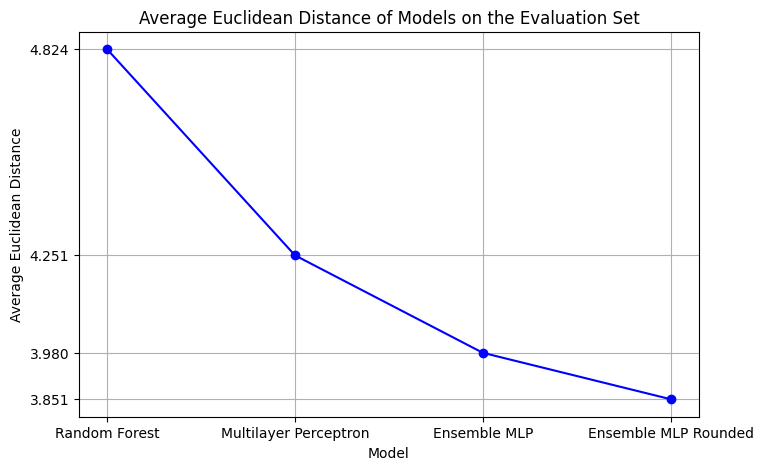

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Multilayer Perceptron', 'Ensemble MLP', 'Ensemble MLP Rounded']
euclidean_distances = [4.824, 4.251, 3.98, 3.851]

# Sorting the models by their Euclidean distances in descending order
sorted_indices_desc = sorted(range(len(euclidean_distances)), key=lambda k: euclidean_distances[k], reverse=True)
sorted_models_desc = [models[i] for i in sorted_indices_desc]
sorted_euclidean_distances_desc = [euclidean_distances[i] for i in sorted_indices_desc]

# Creating the line chart
plt.figure(figsize=(8, 5))
plt.plot(sorted_models_desc, sorted_euclidean_distances_desc, marker='o', linestyle='-', color='blue')
plt.xlabel('Model')
plt.ylabel('Average Euclidean Distance')
plt.title('Average Euclidean Distance of Models on the Evaluation Set')
plt.grid(True)
plt.yticks(sorted_euclidean_distances_desc)

plt.show()